<a href="https://colab.research.google.com/github/sautrikc/-Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

# Problem Statement
Data Link : 
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

# About Dataset

# Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# Content
There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

# Inspiration

Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?
Which variables are the strongest predictors of default payment?

# Project Objective

**Background Goal:-**
- To determine the important factors or variables are the strongest predictors of default payment and that can influence the chance of credit card default.
- The probabilities of default on a payment that are affected by a variety of demographic factors.

---

**Number of Resources:-**5

---


**Business Impact:-**
- Predict the chance of the bank's customers defaulting on their credit cards in the future month.
- Build a strategy to convert bad customer to good customer.
- Loss Provisioning

---


**Time Taken:-**
- Data exploration-1 day
- Data Cleaning and Preparation-1 day
- Model Building and Validation-1 day

In [1]:
# Importing Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
cred_data=pd.read_csv('https://raw.githubusercontent.com/sautrikc/-Credit-Card-Fraud-Detection/main/UCI_Credit_Card.csv')

In [3]:
cred_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Exploration and Validation


In [4]:
cred_data.shape

(30000, 25)

In [5]:
cred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# Checking for null values in any columns
cred_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

## Categorical Variable Exploration

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


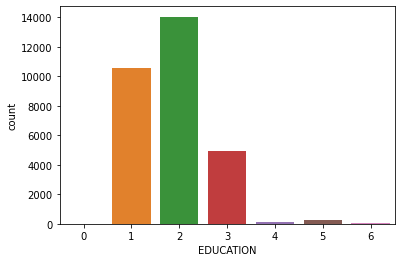

In [7]:
# Category 0,5,6 are undocumented so needed to be checked
print(cred_data['EDUCATION'].value_counts())
sns.countplot(cred_data['EDUCATION'])

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


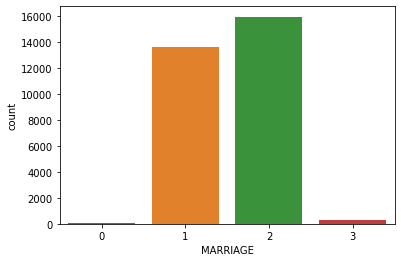

In [8]:
# Category 0 is undocumented to be checked
print(cred_data['MARRIAGE'].value_counts())
sns.countplot(cred_data['MARRIAGE'])

In [9]:
# Some of the age values are more than 70 which is fine.
cred_data['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [10]:
cred_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [11]:
# All the pay are having -2,0 category that are undocumented.
# Given category -1 as pay duly(properly paid on time)
# So -2,0,-1 can be treated as one category. to be checked
print(cred_data['PAY_0'].value_counts())
print(cred_data['PAY_2'].value_counts())

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


## Continous Variable Exploration

In [12]:
# BILL_AMT1 having 1% of negative values
# BILL_AMT2 TO BILL_AMT6 having 2% negative values
# can be treated as extra paid

# Looks like Bill amount has 1% of outliers - to be cleaned
cred_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].quantile([0,0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.09,0.1,
0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
0.01,-81.00,-200.00,-200.00,-212.02,-232.01,-331.03
0.02,0.00,-4.00,-3.00,-3.02,-3.02,-6.00
0.03,0.00,0.00,0.00,0.00,0.00,0.00
0.04,0.00,0.00,0.00,0.00,0.00,0.00
0.05,0.00,0.00,0.00,0.00,0.00,0.00
0.06,0.00,0.00,0.00,0.00,0.00,0.00
0.08,0.00,0.00,0.00,0.00,0.00,0.00
0.09,131.82,0.00,0.00,0.00,0.00,0.00
0.10,278.90,0.00,0.00,0.00,0.00,0.00


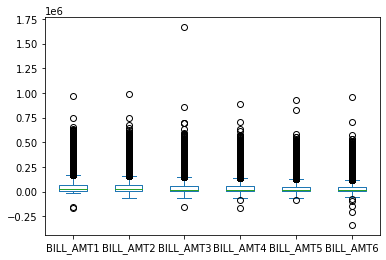

In [13]:
cred_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box')

In [14]:
# Pay amount has 1% of extreme outlier needed to be cleaned
cred_data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.10,0.00,0.00,0.00,0.00,0.00,0.00
0.20,316.00,268.80,2.80,0.00,0.00,0.00
0.30,1263.70,1165.00,780.00,500.00,500.00,426.00
0.40,1724.00,1600.00,1206.00,1000.00,1000.00,1000.00
0.50,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
0.60,3000.00,3000.00,2500.00,2100.00,2123.40,2100.00
0.70,4309.30,4045.30,3560.30,3200.00,3200.00,3200.00
0.80,6192.20,6000.00,5284.00,5000.00,5000.00,5000.00
0.90,10300.00,10401.10,10000.00,9570.60,9500.00,9600.00


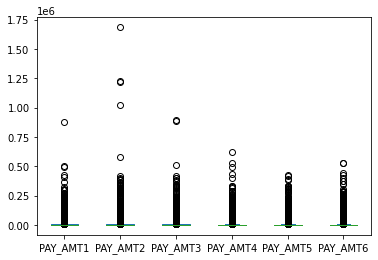

In [15]:
# Extreme Outliers have completely compressed the boxplot
cred_data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].plot(kind='box')

In [16]:
# Limit_Bal contains 1% of extreme outliers - require cleaning
cred_data['LIMIT_BAL'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

0.00      10000.0
0.10      30000.0
0.20      50000.0
0.30      70000.0
0.40     100000.0
0.50     140000.0
0.60     180000.0
0.70     210000.0
0.80     270000.0
0.90     360000.0
0.93     390000.0
0.94     410000.0
0.97     500000.0
0.99     500000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64

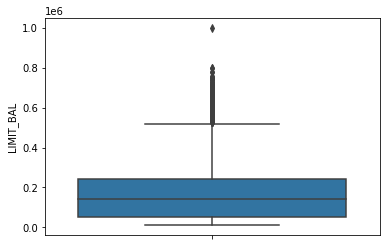

In [17]:
sns.boxplot(y=cred_data['LIMIT_BAL'])

# Data Cleaning

## Cleaning Categorical Variables

In [18]:
# Simply Category 5,6,0 values are undocumented so we can pour it into category 4 metioned others.
unknown=(cred_data['EDUCATION']==5)|(cred_data['EDUCATION']==6)|(cred_data['EDUCATION']==0)
cred_data.loc[unknown,'EDUCATION']=4
cred_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [19]:
# Category 0 value are undocumented so we can pour it into category 3 mentioned as others.
unknown=cred_data['MARRIAGE']==0
cred_data.loc[unknown,'MARRIAGE']=3
cred_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [20]:
# Frequency of each category
cred_data.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [21]:
#Cross tab with target
cross_cred_data2=pd.crosstab(cred_data['PAY_2'],cred_data['default.payment.next.month'])

In [22]:
#Cross tab row Percentages
cross_cred_data2_percent=cross_cred_data2.apply(lambda x: x/x.sum(), axis=1)
round(cross_cred_data2_percent,2)

default.payment.next.month,0,1
PAY_2,,
-2,0.82,0.18
-1,0.84,0.16
0,0.84,0.16
1,0.82,0.18
2,0.44,0.56
3,0.38,0.62
4,0.49,0.51
5,0.40,0.60
6,0.25,0.75


In [23]:
# Treating category -2,-1,0 value as one category 0 for pay duly 
# so going for imputation based on target variable values nearest to them.
fil = (cred_data.PAY_0 == -2) | (cred_data.PAY_0 == -1) | (cred_data.PAY_0 == 0)
cred_data.loc[fil, 'PAY_0'] = 0
fil = (cred_data.PAY_2 == -2) | (cred_data.PAY_2 == -1) | (cred_data.PAY_2 == 0)
cred_data.loc[fil, 'PAY_2'] = 0
fil = (cred_data.PAY_3 == -2) | (cred_data.PAY_3 == -1) | (cred_data.PAY_3 == 0)
cred_data.loc[fil, 'PAY_3'] = 0
fil = (cred_data.PAY_4 == -2) | (cred_data.PAY_4 == -1) | (cred_data.PAY_4 == 0)
cred_data.loc[fil, 'PAY_4'] = 0
fil = (cred_data.PAY_5 == -2) | (cred_data.PAY_5 == -1) | (cred_data.PAY_5 == 0)
cred_data.loc[fil, 'PAY_5'] = 0
fil = (cred_data.PAY_6 == -2) | (cred_data.PAY_6 == -1) | (cred_data.PAY_6 == 0)
cred_data.loc[fil, 'PAY_6'] = 0

In [24]:
# Renaming Pay_0 as pay_1 and default.payment.next as def_pay
cred_data.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEF_PAY'},inplace=True)
pd.set_option('max_columns',None)
cred_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Cleaning Continous Variable

In [25]:
cred_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].quantile([0,0.01,0.02,0.03,0.04,0.05,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
0.01,-81.00,-200.00,-200.00,-212.02,-232.01,-331.03
0.02,0.00,-4.00,-3.00,-3.02,-3.02,-6.00
0.03,0.00,0.00,0.00,0.00,0.00,0.00
0.04,0.00,0.00,0.00,0.00,0.00,0.00
0.05,0.00,0.00,0.00,0.00,0.00,0.00
0.08,0.00,0.00,0.00,0.00,0.00,0.00
0.09,131.82,0.00,0.00,0.00,0.00,0.00
0.10,278.90,0.00,0.00,0.00,0.00,0.00
0.20,1892.80,1472.80,1187.80,988.00,763.00,476.00


In [26]:
# Treating 1% positive outlier by imputation based on the median value of that column
cred_data.loc[cred_data['BILL_AMT1']>350110.68,'BILL_AMT1']=cred_data['BILL_AMT1'].median()
cred_data.loc[cred_data['BILL_AMT2']>337495.28,'BILL_AMT2']=cred_data['BILL_AMT2'].median()
cred_data.loc[cred_data['BILL_AMT3']>325030.39,'BILL_AMT3']=cred_data['BILL_AMT3'].median()
cred_data.loc[cred_data['BILL_AMT4']>304997.27,'BILL_AMT4']=cred_data['BILL_AMT4'].median()
cred_data.loc[cred_data['BILL_AMT5']>285868.33,'BILL_AMT5']=cred_data['BILL_AMT5'].median()
cred_data.loc[cred_data['BILL_AMT6']>279505.06,'BILL_AMT6']=cred_data['BILL_AMT6'].median()

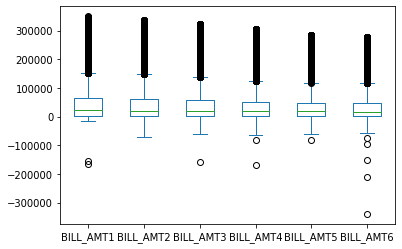

In [27]:
cred_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box')

In [28]:
# Treating 1% negative outlier in BILL_AMT1 and 2% negative outlier in the rest BILL_AMT
# by imputation based on the median value of the negative values of the columns
cred_data.loc[cred_data['BILL_AMT1']<0,'BILL_AMT1']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()
cred_data.loc[cred_data['BILL_AMT2']<0,'BILL_AMT2']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()
cred_data.loc[cred_data['BILL_AMT3']<0,'BILL_AMT3']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()
cred_data.loc[cred_data['BILL_AMT4']<0,'BILL_AMT4']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()
cred_data.loc[cred_data['BILL_AMT5']<0,'BILL_AMT5']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()
cred_data.loc[cred_data['BILL_AMT6']<0,'BILL_AMT6']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()

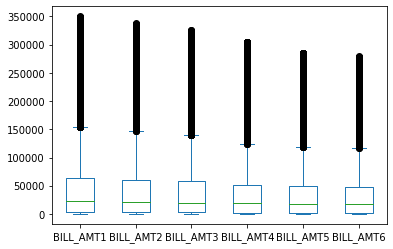

In [29]:
cred_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box')

In [30]:
# Treating 1% extreme outlier by imputation based on the median value of that column
cred_data.loc[cred_data['PAY_AMT1']>67000,'PAY_AMT1']=cred_data['PAY_AMT1'].median()
cred_data.loc[cred_data['PAY_AMT2']>76700,'PAY_AMT2']=cred_data['PAY_AMT2'].median()
cred_data.loc[cred_data['PAY_AMT3']>70000,'PAY_AMT3']=cred_data['PAY_AMT3'].median()
cred_data.loc[cred_data['PAY_AMT4']>67100,'PAY_AMT4']=cred_data['PAY_AMT4'].median()
cred_data.loc[cred_data['PAY_AMT5']>65700,'PAY_AMT5']=cred_data['PAY_AMT5'].median()
cred_data.loc[cred_data['PAY_AMT6']>82700,'PAY_AMT6']=cred_data['PAY_AMT6'].median()

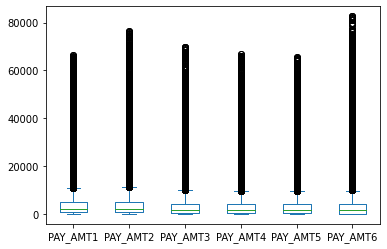

In [31]:
cred_data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].plot(kind='box')

In [32]:
# Treating 1% extreme outlier by imputation based on the median value of that column
cred_data.loc[cred_data['LIMIT_BAL']>500000,'LIMIT_BAL']=cred_data['LIMIT_BAL'].median()

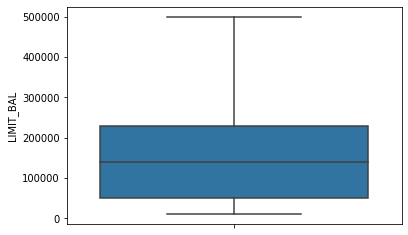

In [33]:
sns.boxplot(y=cred_data['LIMIT_BAL'])

In [34]:
# Copying the clean data for further analysis.
cred_data_new=cred_data.copy(deep=True)
cred_data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Model Building-Logistic Regression

Select the right model, Include Feature Engineering, Perform Model Validation, Multiple models and performance comparison



The problem description and objective of this project, which is to determine the default or non-default of a credit card, make it clear that this is a classification problem, and therefore we can build a Logistic Regression Machine Learning Model.

## Train Test Split

In [35]:
# Creating X array that will contain features and y array will contain the target vector
X=cred_data_new.drop('DEF_PAY',axis=1)
y=cred_data_new['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Checking the shapes of the train and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (24000, 24)
X_test (6000, 24)
y_train (24000,)
y_test (6000,)


In [36]:
# Importing the Library
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(max_iter=2000)


# Building a Multiple Logistic Regression Model by fitting the target and the features
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [37]:
# Coefficient and intercept
print(logistic.coef_)
print(logistic.intercept_)

[[-1.03488131e-05 -2.71620384e-06 -7.82248112e-04 -8.56650600e-04
  -8.79873808e-04 -1.04675285e-02  2.52076586e-03  2.00710757e-03
   1.69324648e-03  1.57391831e-03  1.45056322e-03  1.32456195e-03
  -2.99191194e-06  1.40644666e-06  7.53470236e-07  2.20177919e-06
  -1.71042590e-07  3.65813777e-06 -3.01001474e-05 -4.07761091e-05
  -2.37376362e-05 -1.29389292e-05 -1.78782527e-05 -1.13403894e-05]]
[-0.00040894]


In [38]:
# Prediction of target using the features
pred=logistic.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

# Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc.

In [39]:
# Importing the sklearn package for creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[4733,    0],
       [1267,    0]])

In [40]:
# Calculating the accuracy of the model
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
round(accuracy*100,3)


78.883

## Checking Multicolinearity

In [41]:
# Importing the package
import statsmodels.formula.api as sm
# Creating function for calculating VIF
def vif_cal(input_data):
    x_vars = input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
# Calculating VIF for all the Features
vif_cal(input_data=X_train)

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_1  VIF =  2.04
PAY_2  VIF =  2.69
PAY_3  VIF =  2.64
PAY_4  VIF =  3.04
PAY_5  VIF =  3.28
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  7.35
BILL_AMT2  VIF =  12.06
BILL_AMT3  VIF =  9.26
BILL_AMT4  VIF =  8.17
BILL_AMT5  VIF =  9.72
BILL_AMT6  VIF =  6.77
PAY_AMT1  VIF =  1.37
PAY_AMT2  VIF =  1.36
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.31
PAY_AMT5  VIF =  1.33
PAY_AMT6  VIF =  1.21


The Features that are having VIF<5 are independent features so we can keep these features and VIF>=5 are dependent features which can create a situation of Multicolinearity so we can drop it sequentialy.

In [43]:
# Dropping squentially the feature having the high vif
vif_cal(input_data=X_train.drop('BILL_AMT2',axis=1))

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_1  VIF =  2.04
PAY_2  VIF =  2.69
PAY_3  VIF =  2.64
PAY_4  VIF =  3.04
PAY_5  VIF =  3.28
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  4.14
BILL_AMT3  VIF =  7.04
BILL_AMT4  VIF =  8.16
BILL_AMT5  VIF =  9.72
BILL_AMT6  VIF =  6.76
PAY_AMT1  VIF =  1.32
PAY_AMT2  VIF =  1.35
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.31
PAY_AMT5  VIF =  1.33
PAY_AMT6  VIF =  1.21


In [44]:
vif_cal(input_data=X_train.drop(['BILL_AMT2','BILL_AMT5'],axis=1))

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_1  VIF =  2.04
PAY_2  VIF =  2.69
PAY_3  VIF =  2.64
PAY_4  VIF =  3.04
PAY_5  VIF =  3.28
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  4.13
BILL_AMT3  VIF =  7.0
BILL_AMT4  VIF =  6.81
BILL_AMT6  VIF =  4.04
PAY_AMT1  VIF =  1.32
PAY_AMT2  VIF =  1.35
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.27
PAY_AMT5  VIF =  1.31
PAY_AMT6  VIF =  1.21


In [45]:
vif_cal(input_data=X_train.drop(['BILL_AMT2','BILL_AMT5','BILL_AMT3'],axis=1))

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_1  VIF =  2.04
PAY_2  VIF =  2.69
PAY_3  VIF =  2.64
PAY_4  VIF =  3.04
PAY_5  VIF =  3.28
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  2.9
BILL_AMT4  VIF =  5.06
BILL_AMT6  VIF =  4.02
PAY_AMT1  VIF =  1.31
PAY_AMT2  VIF =  1.32
PAY_AMT3  VIF =  1.29
PAY_AMT4  VIF =  1.27
PAY_AMT5  VIF =  1.31
PAY_AMT6  VIF =  1.21


In [46]:
# Looks like there are no more high vif that means no more interdependency between the feature
vif_cal(input_data=X_train.drop(['BILL_AMT2','BILL_AMT5','BILL_AMT3','BILL_AMT4'],axis=1))

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.36
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_1  VIF =  2.04
PAY_2  VIF =  2.69
PAY_3  VIF =  2.64
PAY_4  VIF =  3.04
PAY_5  VIF =  3.28
PAY_6  VIF =  2.32
BILL_AMT1  VIF =  2.24
BILL_AMT6  VIF =  2.35
PAY_AMT1  VIF =  1.31
PAY_AMT2  VIF =  1.31
PAY_AMT3  VIF =  1.27
PAY_AMT4  VIF =  1.27
PAY_AMT5  VIF =  1.3
PAY_AMT6  VIF =  1.21


## Checking the Individual Impact of Variables

In [47]:
# Importing the statsmodel library
import statsmodels.discrete.discrete_model as sm
m=sm.Logit(y,X)
# Fitting feature to the model
Res=m.fit()
# Printing Summary
print(Res.summary())

Optimization terminated successfully.
         Current function value: 0.445289
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29976
Method:                           MLE   Df Model:                           23
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.1573
Time:                        17:32:15   Log-Likelihood:                -13359.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID         -3.893e-06   1.76e-06     -2.209      0.027   -7.35e-06   -4.38e-07
LIMIT_BAL  -1.538e-06   1.53e

### Findings

- From the vif calculation we have found the feature 'BILL_AMT2','BILL_AMT5','BILL_AMT3','BILL_AMT4' are highly dependent which can result to the situation of multicolinearity so we can drop it.

- In the above summary observation we can see that P|z| of ID,PAY_2,BILL_AMT1,BILL_AMT6 are >0.05 that means these features are non impactful features so we can drop it.


In [48]:
# Dropping the feature that are not required
X.drop(['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_2','ID'],axis=1,inplace=True)

In [49]:
# Importing the statsmodel library
import statsmodels.discrete.discrete_model as sm
m=sm.Logit(y,X)
# Fitting feature to the model
Res=m.fit()
# Printing Summary
print(Res.summary())

Optimization terminated successfully.
         Current function value: 0.445549
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29984
Method:                           MLE   Df Model:                           15
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.1568
Time:                        17:32:15   Log-Likelihood:                -13366.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -1.538e-06   1.51e-07    -10.170      0.000   -1.83e-06   -1.24e-06
SEX           -0.2517      0.

## Rebuilding the Model

In [50]:
# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Checking the shapes of the train and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (24000, 16)
X_test (6000, 16)
y_train (24000,)
y_test (6000,)


In [51]:
# Fitting the feature and target vector to the model
logistic.fit(X_train,y_train)
# Predicting the target
pred=logistic.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

### Confusion Matrix,Accuracy,Sensitivity,Specificity

In [52]:
# Creating confusion matrix
cm=confusion_matrix(y_test,pred)
cm
# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,3))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

Accuracy= 78.883
Sensitivity- 100.0
Specificity- 0.0


- Looks like the accuracy has not changed after dropping the unwanted features

- Looking at the Specificity and Sensitivity we got to know that there is huge class imbalance.



## Wald Chi-Square Method

- Lets use Wald Chi-Square Method to choose the higher ranking top 5 best features from the overall and try predicting on those for checking the effect on the accuracy.

In [53]:
round(Res.tvalues.pow(2)).sort_values(ascending=False).head(5)

PAY_1        1654.0
MARRIAGE      217.0
LIMIT_BAL     103.0
SEX            83.0
EDUCATION      37.0
dtype: float64

In [54]:
X1=cred_data_new[['PAY_1','MARRIAGE','LIMIT_BAL','SEX','EDUCATION']]
y1=cred_data_new['DEF_PAY']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=50)

# Fitting the target and the features
logistic.fit(X1_train,y1_train)

#predict
Pred2=logistic.predict(X1_test)
Pred2

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
# Confusion Matrix and Accuracy
cm1=confusion_matrix(y1_test,Pred2)
print(cm1)

total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,3))

[[4733    0]
 [1267    0]]
Accuracy= 78.883


- So there is no effect on Accuracy

# Model Selection Cross validation

In [56]:
# Copying the clean data for further analysis.
cred_data_new=cred_data.copy(deep=True)
cred_data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [57]:
X=cred_data_new.drop('DEF_PAY',axis=1)
y=cred_data_new['DEF_PAY']

### Using Statsmodel Logistic Regression 

In [58]:
# Importing the statsmodel library
import statsmodels.discrete.discrete_model as sm
m=sm.Logit(y,X)
# Fitting feature to the model
results=m.fit()
# Printing Summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.445289
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29976
Method:                           MLE   Df Model:                           23
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.1573
Time:                        17:32:16   Log-Likelihood:                -13359.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID         -3.893e-06   1.76e-06     -2.209      0.027   -7.35e-06   -4.38e-07
LIMIT_BAL  -1.538e-06   1.53e

In [59]:
# Predict the traget using the features
predict1=results.predict()

### Confusion Matrix,Accuracy,Sensitivity,Specificity

In [60]:
# Taking the threshold value 0.5 as it is logistic regression
threshold=0.5
predictions1=[ 0 if x < threshold else 1 for x in predict1]

# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y,predictions1)
print(cm)

total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[22378   986]
 [ 4491  2145]]
Accuracy= 81.74
Sensitivity- 95.78
Specificity- 32.32


## Using Sklearn Logistic Regression

In [61]:
# Creating X array that will contain features and y array will contain the target vector
X=cred_data_new.drop('DEF_PAY',axis=1)
y=cred_data_new['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Importing the Library
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression( solver='newton-cg', max_iter=200)

# Building a Multiple Logistic Regression Model by fitting the target and the features
logistic.fit(X_train,y_train)

# Prediction of target using the features
pred=logistic.predict(X_train)
pred

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_train,pred)
print(cm)

total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[17843   788]
 [ 3593  1776]]
Accuracy= 81.75
Sensitivity- 95.77
Specificity- 33.08


### Classification Report

- Classification gives a report of all the calculation of recall,precision,F1-Score and the Overall Accuracy.
- Specificity is also known as Recall of class 1 and Sensitivity is also known as Recall of class 0.


In [63]:
# Importing classification report from sklearn library
from sklearn.metrics import classification_report
print(classification_report(y,predictions1))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     23364
           1       0.69      0.32      0.44      6636

    accuracy                           0.82     30000
   macro avg       0.76      0.64      0.67     30000
weighted avg       0.80      0.82      0.79     30000



- From the above class wise accuracy we got to know that data is having class imbalance.

# Handling Class Imbalance

## ROC Curve-Optimum Threshold Selection

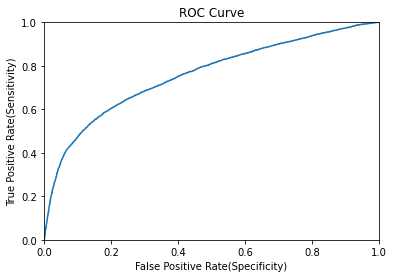

In [64]:
# Importing the roc_curve,auc
from sklearn.metrics import roc_curve,auc,accuracy_score

fpr, tpr, thresholds = roc_curve(y,predict1)

# Drawing ROC_Curve
plt.plot(fpr,tpr)
plt.title('ROC Curve')
#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

- From the above curve the optimal value of threshold lies in the range of 0.2 to 0.4.


### Area Under Curve(AUC)

In [65]:
auc(fpr,tpr)
# Higher the AUC better is the model

0.758298225767653

In [66]:
# Calculating each threshold wise accuracy score
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(predict1>thres,1,0)
    accuracy_ls.append(accuracy_score(y, y_pred))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(10)

,thresholds,accuracy
1618,0.451010,0.819467
1617,0.451361,0.819433
1615,0.451556,0.819433
1619,0.450711,0.819400
1614,0.451697,0.819400
1616,0.451407,0.819400
1621,0.450573,0.819400
1623,0.450107,0.819367
1622,0.450521,0.819367
1620,0.450647,0.819367


- Observing Thershold of 0.45 as the optimum value for better accuracy but we have to choose a optimal value of threshold with an improved Specificity without sacrificing accuracy alot so lets try threshold from 0.2-0.4.

### Accuracy,Sensitivity and Specificity 

In [67]:
# Choosing thershold of 0.45 as the optimum value for better accuracy
threshold1=0.45
predictions1=[ 0 if x < threshold1 else 1 for x in predict1]

# Creating confusion matrix
cm=confusion_matrix(y,predictions1)
print(cm)

# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[22150  1214]
 [ 4206  2430]]
Accuracy- 81.93
Sensitivity- 94.8
Specificity- 36.62


- Specificity has incresed without changing the overall Accuracy

In [68]:
# Choosing thershold of 0.3 as the optimum value for better accuracy
threshold2=0.3
predictions2=[ 0 if x < threshold2 else 1 for x in predict1]

# Creating confusion matrix
cm=confusion_matrix(y,predictions2)
print(cm)

# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[20756  2608]
 [ 3360  3276]]
Accuracy- 80.11
Sensitivity- 88.84
Specificity- 49.37


- Specificity has incresed 14% than the previous with a 1% drop in the overall Accuracy

In [69]:
# Choosing thershold of 0.2 as the optimum value for better accuracy
threshold3=0.2
predictions3=[ 0 if x < threshold3 else 1 for x in predict1]

# Creating confusion matrix
cm=confusion_matrix(y,predictions3)
print(cm)

# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[18020  5344]
 [ 2463  4173]]
Accuracy- 73.98
Sensitivity- 77.13
Specificity- 62.88


- Specificity took a good jump with the threshold of 0.2 without sacrificing much in the overall accruacy.

### Precision,Recall & F1-Score

In [70]:
# Importing classification report from sklearn library
from sklearn.metrics import classification_report
print(classification_report(y,predictions1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     23364
           1       0.67      0.37      0.47      6636

    accuracy                           0.82     30000
   macro avg       0.75      0.66      0.68     30000
weighted avg       0.80      0.82      0.80     30000



## OverSampling and Undersampling

In [71]:
# Copying the clean data for further analysis.
cred_data_new=cred_data.copy(deep=True)
cred_data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [72]:
cred_data_new.shape

(30000, 25)

In [73]:
# Chceking the percentage of Imbalance of the class in the data
freq=cred_data_new['DEF_PAY'].value_counts()
print(freq)
print((freq/freq.sum())*100)

0    23364
1     6636
Name: DEF_PAY, dtype: int64
0    77.88
1    22.12
Name: DEF_PAY, dtype: float64


In [74]:
# Oversampling of minority class
# Lets increase the size by Two times
df=cred_data_new[cred_data_new['DEF_PAY']==1]
df_oversample=df.sample(2*len(df),replace=True)
df_oversample.shape

(13272, 25)

In [75]:
# Undersampling the majority class
## Considering 70% of class-0
df1=cred_data_new[cred_data_new['DEF_PAY']==0]
df_undersample=df1.sample(int(0.7*len(df1)))
df_undersample.shape

(16354, 25)

In [76]:
# Concatenating both undersample data and oversample data to create a balanced dataset
cred_new_balanced=pd.concat([df_oversample,df_undersample])
cred_new_balanced.shape

(29626, 25)

In [77]:
# Chceking the percentage of balanced data after oversampling and undersampling
freq=cred_new_balanced['DEF_PAY'].value_counts()
print((freq/freq.sum())*100)

0    55.201512
1    44.798488
Name: DEF_PAY, dtype: float64


- Oversampled the minority class to nearly match the majority Class

### Using Statsmodel Logistic Regression

In [78]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

## Function Calling
model_formula=ols_formula(cred_new_balanced.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + PAY_1 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6


In [79]:
import statsmodels.formula.api as sm

m1=sm.logit(model_formula,data=cred_new_balanced)
results=m1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.577425
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                29626
Model:                          Logit   Df Residuals:                    29602
Method:                           MLE   Df Model:                           23
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.1604
Time:                        17:32:49   Log-Likelihood:                -17107.
converged:                       True   LL-Null:                       -20375.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1801      0.105     -1.713      0.087      -0.386       0.026
LIMIT_BAL  -1.158e-06   1.26e

In [80]:
# Predicting the probability of predictor 
predict_balanced=results.predict()
predict_balanced

array([0.79800351, 0.74315749, 0.28238667, ..., 0.29414155, 0.32037196,
       0.81394766])

In [81]:
# Choosing thershold of 0.5 as it is a Logistic regression Model
threshold1=0.5
predictions1=[ 0 if x < threshold1 else 1 for x in predict_balanced]

# Creating confusion matrix
cm=confusion_matrix(cred_new_balanced['DEF_PAY'],predictions1)
print(cm)

# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[14089  2265]
 [ 6263  7009]]
Accuracy- 71.21
Sensitivity- 86.15
Specificity- 52.81


### Using Sklearn Logistic Regression

In [82]:
X_balanced=cred_new_balanced.drop('DEF_PAY',axis=1)
y_balanced=cred_new_balanced['DEF_PAY']

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=50)

logistic=LogisticRegression(solver='newton-cg',max_iter=200)

# Fitting the target and the features
logistic.fit(X_train,y_train)

#predict
pred1=logistic.predict(X_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

### Updated Sensitivity and Specificity

In [83]:
# Creating confusion matrix
cm=confusion_matrix(y_train,pred1)
print(cm)

# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[11164  1838]
 [ 4993  5705]]
Accuracy- 71.18
Sensitivity- 85.86
Specificity- 53.33


- The statsmodel logistic Regression Specificity and sklearn Logistic Regression Specificity are almost equal.

In [84]:
# Importing classification report from sklearn library
from sklearn.metrics import classification_report
print(classification_report(y_train,pred1))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77     13002
           1       0.76      0.53      0.63     10698

    accuracy                           0.71     23700
   macro avg       0.72      0.70      0.70     23700
weighted avg       0.72      0.71      0.70     23700



## SMOTE Technique

In [85]:
# Copying the clean data for further analysis.
cred_data_new=cred_data.copy(deep=True)
cred_data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Vizualizing Imbalanced Data Before Smote

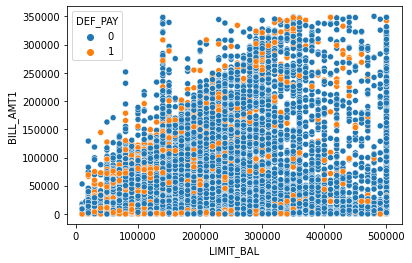

In [86]:
sns.scatterplot(x='LIMIT_BAL',y='BILL_AMT1',data=cred_data_new,hue='DEF_PAY')

- Observing a High Class Imbalance Before SMOTE

In [87]:
X=cred_data_new.drop('DEF_PAY',axis=1)
y=cred_data_new['DEF_PAY']

# Importing imblearn library for importing SMOTE Function
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.9,random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X,y)

# Getting the collection of counts of each class
import collections
print("Before_Smote",collections.Counter(y))
print("After_Smote",collections.Counter(y_train_smote))

Before_Smote Counter({0: 23364, 1: 6636})
After_Smote Counter({0: 23364, 1: 21027})


- Minority class size is increased to match the size of majority class.

In [88]:
# Creating a new dataset having the balanced data
cred_new_smote=X_train_smote
cred_new_smote['DEF_PAY']=y_train_smote
cred_new_smote.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [89]:
freq=cred_new_smote['DEF_PAY'].value_counts()
print((freq/freq.sum())*100)

0    52.63229
1    47.36771
Name: DEF_PAY, dtype: float64


### Visulaizing balanced data after SMOTE

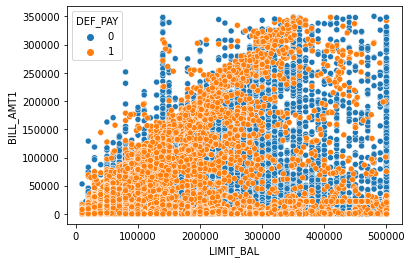

In [90]:
sns.scatterplot(x='LIMIT_BAL',y='BILL_AMT1',data=cred_new_smote,hue='DEF_PAY')

### Using Statsmodel Logistic Regression

In [91]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

## Function Calling
model_formula=ols_formula(cred_new_smote.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + AGE + PAY_1 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6


In [92]:
import statsmodels.formula.api as sm

# Building Statistical Logistic Regression Model
m=sm.logit(model_formula,data=cred_new_smote)

results=m.fit()

# Printing the result summary
print(results.summary())

pred_smote = results.predict()

Optimization terminated successfully.
         Current function value: 0.548393
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44367
Method:                           MLE   Df Model:                           23
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.2073
Time:                        17:33:05   Log-Likelihood:                -24344.
converged:                       True   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2622      0.089     48.063      0.000       4.088       4.436
LIMIT_BAL  -2.354e-06   1.09e

In [93]:
# Choosing thershold of 0.5 for Logistic Regression
threshold4=0.5
predictions4=[ 0 if x < threshold4 else 1 for x in pred_smote]

from sklearn.metrics import confusion_matrix

# Creating confusion matrix
cm=confusion_matrix(cred_new_smote['DEF_PAY'],predictions4)
print(cm)

# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[18492  4872]
 [ 6989 14038]]
Accuracy- 73.28
Sensitivity- 79.15
Specificity- 66.76


### Using Sklearn Logistic Regression

In [94]:
X=cred_new_smote.drop('DEF_PAY',axis=1)
y=cred_new_smote['DEF_PAY']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

logistic=LogisticRegression(solver='newton-cg',max_iter=200)

# Fitting the target and the features
logistic.fit(X_train,y_train)

#predict
pred1_smote=logistic.predict(X_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

### Updated Sensitivity and Specificity

In [95]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_train,pred1_smote)
print(cm)

# Calculating Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy-',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[14788  3893]
 [ 5539 11292]]
Accuracy- 73.44
Sensitivity- 79.16
Specificity- 67.09


- There statsmodel logistic Regression Specificity and sklearn Logistic Regression Specificity is almost having equal value.

In [96]:
# Importing classification report from sklearn library
from sklearn.metrics import classification_report
print(classification_report(y_train,pred1_smote))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76     18681
           1       0.74      0.67      0.71     16831

    accuracy                           0.73     35512
   macro avg       0.74      0.73      0.73     35512
weighted avg       0.74      0.73      0.73     35512



Checking for Overfitting and Underfitting

In [97]:
pred2_smote=logistic.predict(X_test)
# Creating confusion matrix
cm1=confusion_matrix(y_test,pred2_smote)
print(cm1)

# Calculating Train Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Train Accuracy-',round(accuracy*100,2))

# Calculating Test Accuracy
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Test Accuracy-',round(accuracy1*100,2))

[[3663 1020]
 [1396 2800]]
Train Accuracy- 73.44
Test Accuracy- 72.79


- Accuracy on the training data and nearly matching accuracy on the test data but it looks like model is underfitted and still needs improvement.

# Feature Engineering

In [98]:
cred_new_smote.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEF_PAY'],
      dtype='object')

In [99]:
# Encoding the female sex category to 0
cred_new_smote.loc[cred_new_smote['SEX']==2,'SEX']=0

## One Hot Encoding Categorical Variables

In [100]:
# Creating dummy variables of each categorical variables
cred_data_ohe=pd.get_dummies(cred_new_smote,prefix=['EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
               prefix_sep='_',columns=['EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],drop_first=True)
cred_data_ohe.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_1,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
cred_data_ohe['PAY_2_8'].value_counts()

0    44390
1        1
Name: PAY_2_8, dtype: int64

### Train_test_split

In [102]:
# Creating X array that will contain features and y array will contain the target vector
X=cred_data_ohe.drop('DEF_PAY',axis=1)
y=cred_data_ohe['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Checking the shapes of the train and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (35512, 69)
X_test (8879, 69)
y_train (35512,)
y_test (8879,)


### Building Logistic regression model

In [103]:
# Importing the Library
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(solver='newton-cg',max_iter=200)

# Building a Multiple Logistic Regression Model by fitting the target and the features
logistic.fit(X_train,y_train)

# Prediction of target using the features
predict=logistic.predict(X_test)
predict

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

array([1, 0, 1, ..., 1, 1, 0])

In [104]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict)
print(cm)

total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[3915  768]
 [1416 2780]]
Accuracy= 75.4
Sensitivity- 83.6
Specificity- 66.25


### Checking Individual impactness of feature

In [105]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

## Function Calling
model_formula=ols_formula(cred_data_ohe.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + AGE + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_1_6 + PAY_1_7 + PAY_1_8 + PAY_2_1 + PAY_2_2 + PAY_2_3 + PAY_2_4 + PAY_2_5 + PAY_2_6 + PAY_2_7 + PAY_2_8 + PAY_3_1 + PAY_3_2 + PAY_3_3 + PAY_3_4 + PAY_3_5 + PAY_3_6 + PAY_3_7 + PAY_3_8 + PAY_4_1 + PAY_4_2 + PAY_4_3 + PAY_4_4 + PAY_4_5 + PAY_4_6 + PAY_4_7 + PAY_4_8 + PAY_5_1 + PAY_5_2 + PAY_5_3 + PAY_5_4 + PAY_5_5 + PAY_5_6 + PAY_5_7 + PAY_5_8 + PAY_6_1 + PAY_6_2 + PAY_6_3 + PAY_6_4 + PAY_6_5 + PAY_6_6 + PAY_6_7 + PAY_6_8


In [106]:
import statsmodels.formula.api as sm
# Building statistical logistic regression model
m1=sm.logit(model_formula,data=cred_data_ohe)
results=m1.fit()
print(results.summary())

         Current function value: 0.494813
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44322
Method:                           MLE   Df Model:                           68
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.2847
Time:                        17:33:43   Log-Likelihood:                -21965.
converged:                      False   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5976      0.064      9.379      0.000       0.473       0.723
LIMIT_BAL   -1.815e-06   1.14e-07    -15.866      0.000   -2.04e-06   -1.59e-06
SEX             0.7530      0.024     32.025    

In [107]:
# Checking the variable whose pvalue is >= 0.05 (Non Impactful Features)
pd.set_option('max_rows',None)
results.pvalues>=0.05

Intercept      False
LIMIT_BAL      False
SEX            False
AGE            False
BILL_AMT1       True
BILL_AMT2       True
BILL_AMT3       True
BILL_AMT4       True
BILL_AMT5      False
BILL_AMT6      False
PAY_AMT1       False
PAY_AMT2       False
PAY_AMT3       False
PAY_AMT4       False
PAY_AMT5       False
PAY_AMT6       False
EDUCATION_2    False
EDUCATION_3    False
EDUCATION_4    False
MARRIAGE_2     False
MARRIAGE_3     False
PAY_1_1        False
PAY_1_2        False
PAY_1_3        False
PAY_1_4        False
PAY_1_5        False
PAY_1_6         True
PAY_1_7         True
PAY_1_8         True
PAY_2_1        False
PAY_2_2         True
PAY_2_3         True
PAY_2_4        False
PAY_2_5         True
PAY_2_6         True
PAY_2_7         True
PAY_2_8         True
PAY_3_1        False
PAY_3_2        False
PAY_3_3         True
PAY_3_4         True
PAY_3_5         True
PAY_3_6         True
PAY_3_7         True
PAY_3_8         True
PAY_4_1        False
PAY_4_2        False
PAY_4_3      

In [108]:
cred_data_ohe.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEF_PAY',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6',
       'PAY_1_7', 'PAY_1_8', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_7', 'PAY_4_8', 'PAY_5_1', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_1', 'PAY_6_2',
       'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],
      dtype='object')

In [109]:
# Dropping all the Non-Impactful Features
cred_data_ohe.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4','PAY_1_6','PAY_1_7', 'PAY_1_8','PAY_2_2', 'PAY_2_3','PAY_2_5','PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5','PAY_3_6','PAY_3_7', 'PAY_3_8',
       'PAY_4_3', 'PAY_4_4','PAY_4_6','PAY_4_7','PAY_4_8','PAY_5_1','PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7','PAY_5_8','PAY_6_1','PAY_6_4','PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],axis=1,inplace=True)

In [110]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

## Function Calling
model_formula=ols_formula(cred_data_ohe.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + AGE + BILL_AMT5 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_4_5 + PAY_5_2 + PAY_6_2 + PAY_6_3


In [111]:
import statsmodels.formula.api as sm
# Rebuilding Statsmodel for rechecking
m1=sm.logit(model_formula,data=cred_data_ohe)
results=m1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.504590
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44359
Method:                           MLE   Df Model:                           31
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.2706
Time:                        17:33:44   Log-Likelihood:                -22399.
converged:                       True   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6853      0.063     10.866      0.000       0.562       0.809
LIMIT_BAL   -1.985e-06   

- After rechecking of the features 'BILL_AMT5','PAY_4_5','PAY_6_3' are having  pvalues >=0.05 so considering them as Non-impactful features and dropping them.

In [112]:
cred_data_ohe.drop(['BILL_AMT5','PAY_4_5','PAY_6_3'],axis=1,inplace=True)

In [113]:
## OLS formula Function Calling
model_formula=ols_formula(cred_data_ohe.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + AGE + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + PAY_6_2


In [114]:
import statsmodels.formula.api as sm
# Rebuilding Statsmodel for rechecking
m1=sm.logit(model_formula,data=cred_data_ohe)
results=m1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.504652
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44362
Method:                           MLE   Df Model:                           28
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.2705
Time:                        17:33:45   Log-Likelihood:                -22402.
converged:                       True   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6874      0.063     10.901      0.000       0.564       0.811
LIMIT_BAL   -1.993e-06   

- After rechecking of the features 'PAY_6_2' is having  pvalues >=0.05 so considering it as Non-impactful feature and dropping it.

In [115]:
cred_data_ohe.drop(['PAY_6_2'],axis=1,inplace=True)

In [116]:
## OLS formula Function Calling
model_formula=ols_formula(cred_data_ohe.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ LIMIT_BAL + SEX + AGE + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2


In [117]:
import statsmodels.formula.api as sm

m1=sm.logit(model_formula,data=cred_data_ohe)
results=m1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.504693
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44363
Method:                           MLE   Df Model:                           27
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.2704
Time:                        17:33:45   Log-Likelihood:                -22404.
converged:                       True   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6902      0.063     10.949      0.000       0.567       0.814
LIMIT_BAL   -2.004e-06   

- Keeping these features as they are impactful and all of them are having Pvalue < 0.05

### Checking Multicolinearity

In [118]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [119]:
# Calculating VIF
vif_cal(input_data=cred_data_ohe, dependent_col="DEF_PAY")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.4
SEX  VIF =  1.04
AGE  VIF =  1.31
BILL_AMT6  VIF =  1.23
PAY_AMT1  VIF =  1.31
PAY_AMT2  VIF =  1.33
PAY_AMT3  VIF =  1.29
PAY_AMT4  VIF =  1.27
PAY_AMT5  VIF =  1.3
PAY_AMT6  VIF =  1.22
EDUCATION_2  VIF =  1.28
EDUCATION_3  VIF =  1.3
EDUCATION_4  VIF =  1.02
MARRIAGE_2  VIF =  1.24
MARRIAGE_3  VIF =  1.02
PAY_1_1  VIF =  1.21
PAY_1_2  VIF =  1.28
PAY_1_3  VIF =  1.07
PAY_1_4  VIF =  1.06
PAY_1_5  VIF =  1.32
PAY_2_1  VIF =  1.45
PAY_2_4  VIF =  1.39
PAY_3_1  VIF =  1.91
PAY_3_2  VIF =  1.72
PAY_4_1  VIF =  1.54
PAY_4_2  VIF =  2.03
PAY_5_2  VIF =  1.63


- None of the features are having the VIF>=5 so these features are independent and we can keep them.

### Rebuilding the Model 

In [120]:
X=cred_data_ohe.drop('DEF_PAY',axis=1)
y=cred_data_ohe['DEF_PAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

logistic=LogisticRegression(solver='newton-cg',max_iter=200)
# Fitting the target and the features
logistic.fit(X_train,y_train)

#predict
pred2=logistic.predict(X_test)
pred3=logistic.predict(X_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

### Confusion Matrix,Accuracy,Sensitivity and Specificity

In [121]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred2)
print(cm,"\n")

cm1=confusion_matrix(y_train,pred3)
print(cm1,"\n")

# Calculating Train Accuracy
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Train Accuracy=',round(accuracy1*100,2))

# Calculating Test Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Test Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[3871  812]
 [1408 2788]] 

[[15574  3107]
 [ 5772 11059]] 

Train Accuracy= 75.0
Test Accuracy= 75.0
Sensitivity- 82.66
Specificity- 66.44


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78      4683
           1       0.77      0.66      0.72      4196

    accuracy                           0.75      8879
   macro avg       0.75      0.75      0.75      8879
weighted avg       0.75      0.75      0.75      8879



## Binning Continous Variables

In [123]:
cred_data_ohe.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEF_PAY',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_2_1',
       'PAY_2_4', 'PAY_3_1', 'PAY_3_2', 'PAY_4_1', 'PAY_4_2', 'PAY_5_2'],
      dtype='object')

### Binning LIMIT_BAL

In [124]:
df=pd.qcut(cred_data_ohe['LIMIT_BAL'],q=10)
df['bin1']=pd.qcut(cred_data_ohe['LIMIT_BAL'],q=10)
df['bin1'].value_counts()

(9999.999, 30000.0]       7218
(30000.0, 50000.0]        5725
(120000.0, 160000.0]      4942
(80000.0, 120000.0]       4691
(243231.449, 340000.0]    4545
(160000.0, 200000.0]      4488
(340000.0, 500000.0]      4333
(200000.0, 243231.449]    3545
(60000.0, 80000.0]        3539
(50000.0, 60000.0]        1365
Name: LIMIT_BAL, dtype: int64

### Binning AGE

In [125]:
df['bin2']=pd.qcut(cred_data_ohe['AGE'],q=10)
df['bin2'].value_counts()

(29.0, 32.0]      5737
(20.999, 25.0]    5410
(34.0, 37.0]      5160
(39.0, 43.0]      4967
(27.0, 29.0]      4359
(43.0, 48.0]      4216
(48.0, 79.0]      4030
(25.0, 27.0]      3851
(32.0, 34.0]      3684
(37.0, 39.0]      2977
Name: AGE, dtype: int64

### Binning BILL_AMT6

In [126]:
df['bin3']=pd.qcut(cred_data_ohe['BILL_AMT6'],q=10)
df['bin3'].value_counts()

(-90.501, 0.0]           6060
(9297.0, 17071.0]        4508
(535.828, 2806.0]        4440
(24492.0, 36325.0]       4439
(36325.0, 58092.923]     4439
(58092.923, 102620.0]    4439
(102620.0, 279503.0]     4439
(2806.0, 9297.0]         4438
(17071.0, 24492.0]       4370
(0.0, 535.828]           2819
Name: BILL_AMT6, dtype: int64

### Binning PAY_AMT1 to PAY_AMT6

In [127]:
df['bin4']=pd.qcut(cred_data_ohe['PAY_AMT1'],q=10,duplicates='drop')
df['bin5']=pd.qcut(cred_data_ohe['PAY_AMT2'],q=10,duplicates='drop')
df['bin6']=pd.qcut(cred_data_ohe['PAY_AMT3'],q=10,duplicates='drop')
df['bin7']=pd.qcut(cred_data_ohe['PAY_AMT4'],q=10,duplicates='drop')
df['bin8']=pd.qcut(cred_data_ohe['PAY_AMT5'],q=10,duplicates='drop')
df['bin9']=pd.qcut(cred_data_ohe['PAY_AMT6'],q=10,duplicates='drop')

In [128]:
# Concatenating all Created bins to form dataset
data_bins=pd.concat([df['bin1'],df['bin2'],df['bin3'],df['bin4'],df['bin5'],df['bin6'],df['bin7'],df['bin8'],df['bin9']],axis=1)
data_bins.head()

,LIMIT_BAL,AGE,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,"(9999.999, 30000.0]","(20.999, 25.0]","(-90.501, 0.0]","(-0.001, 270.6]","(241.0, 1000.0]","(-0.001, 87.564]","(-0.001, 10.324]","(-0.001, 1.462]","(-0.001, 400.0]"
1,"(80000.0, 120000.0]","(25.0, 27.0]","(2806.0, 9297.0]","(-0.001, 270.6]","(241.0, 1000.0]","(625.425, 1085.0]","(926.0, 1284.872]","(-0.001, 1.462]","(1287.0, 2000.0]"
2,"(80000.0, 120000.0]","(32.0, 34.0]","(9297.0, 17071.0]","(1070.0, 1530.956]","(1479.0, 2000.0]","(625.425, 1085.0]","(926.0, 1284.872]","(944.0, 1342.0]","(4252.0, 7222.0]"
3,"(30000.0, 50000.0]","(34.0, 37.0]","(24492.0, 36325.0]","(1530.956, 2000.0]","(2000.0, 2500.0]","(1085.0, 1570.119]","(926.0, 1284.872]","(944.0, 1342.0]","(870.0, 1287.0]"
4,"(30000.0, 50000.0]","(48.0, 79.0]","(17071.0, 24492.0]","(1530.956, 2000.0]","(8929.0, 76653.0]","(8000.0, 70000.0]","(7463.0, 67052.0]","(460.876, 944.0]","(400.0, 870.0]"


In [129]:
data_bins.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

### One Hot Encoding

In [130]:
# Creating dummy variables  
data_bin_ohe=pd.get_dummies(data_bins,prefix=['LIMIT_BAL', 'AGE', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],prefix_sep='_',columns=['LIMIT_BAL', 'AGE', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],drop_first=True)
data_bin_ohe.head(5)

,"LIMIT_BAL_(30000.0, 50000.0]","LIMIT_BAL_(50000.0, 60000.0]","LIMIT_BAL_(60000.0, 80000.0]","LIMIT_BAL_(80000.0, 120000.0]","LIMIT_BAL_(120000.0, 160000.0]","LIMIT_BAL_(160000.0, 200000.0]","LIMIT_BAL_(200000.0, 243231.449]","LIMIT_BAL_(243231.449, 340000.0]","LIMIT_BAL_(340000.0, 500000.0]","AGE_(25.0, 27.0]","AGE_(27.0, 29.0]","AGE_(29.0, 32.0]","AGE_(32.0, 34.0]","AGE_(34.0, 37.0]","AGE_(37.0, 39.0]","AGE_(39.0, 43.0]","AGE_(43.0, 48.0]","AGE_(48.0, 79.0]","BILL_AMT6_(0.0, 535.828]","BILL_AMT6_(535.828, 2806.0]","BILL_AMT6_(2806.0, 9297.0]","BILL_AMT6_(9297.0, 17071.0]","BILL_AMT6_(17071.0, 24492.0]","BILL_AMT6_(24492.0, 36325.0]","BILL_AMT6_(36325.0, 58092.923]","BILL_AMT6_(58092.923, 102620.0]","BILL_AMT6_(102620.0, 279503.0]","PAY_AMT1_(270.6, 1070.0]","PAY_AMT1_(1070.0, 1530.956]","PAY_AMT1_(1530.956, 2000.0]","PAY_AMT1_(2000.0, 2600.0]","PAY_AMT1_(2600.0, 3600.0]","PAY_AMT1_(3600.0, 5200.0]","PAY_AMT1_(5200.0, 9100.0]","PAY_AMT1_(9100.0, 66513.0]","PAY_AMT2_(241.0, 1000.0]","PAY_AMT2_(1000.0, 1479.0]","PAY_AMT2_(1479.0, 2000.0]","PAY_AMT2_(2000.0, 2500.0]","PAY_AMT2_(2500.0, 3432.339]","PAY_AMT2_(3432.339, 5004.0]","PAY_AMT2_(5004.0, 8929.0]","PAY_AMT2_(8929.0, 76653.0]","PAY_AMT3_(87.564, 625.425]","PAY_AMT3_(625.425, 1085.0]","PAY_AMT3_(1085.0, 1570.119]","PAY_AMT3_(1570.119, 2011.0]","PAY_AMT3_(2011.0, 3000.0]","PAY_AMT3_(3000.0, 4778.0]","PAY_AMT3_(4778.0, 8000.0]","PAY_AMT3_(8000.0, 70000.0]","PAY_AMT4_(10.324, 466.0]","PAY_AMT4_(466.0, 926.0]","PAY_AMT4_(926.0, 1284.872]","PAY_AMT4_(1284.872, 1996.0]","PAY_AMT4_(1996.0, 2912.0]","PAY_AMT4_(2912.0, 4330.505]","PAY_AMT4_(4330.505, 7463.0]","PAY_AMT4_(7463.0, 67052.0]","PAY_AMT5_(1.462, 460.876]","PAY_AMT5_(460.876, 944.0]","PAY_AMT5_(944.0, 1342.0]","PAY_AMT5_(1342.0, 2000.0]","PAY_AMT5_(2000.0, 2992.0]","PAY_AMT5_(2992.0, 4410.0]","PAY_AMT5_(4410.0, 7445.0]","PAY_AMT5_(7445.0, 65663.0]","PAY_AMT6_(400.0, 870.0]","PAY_AMT6_(870.0, 1287.0]","PAY_AMT6_(1287.0, 2000.0]","PAY_AMT6_(2000.0, 2896.293]","PAY_AMT6_(2896.293, 4252.0]","PAY_AMT6_(4252.0, 7222.0]","PAY_AMT6_(7222.0, 82615.0]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [131]:
# Concatenating the dummy variables to original dataframe
cred_new_bin=pd.concat([cred_data_ohe,data_bin_ohe],axis=1)
cred_new_bin.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_2_1,PAY_2_4,PAY_3_1,PAY_3_2,PAY_4_1,PAY_4_2,PAY_5_2,"LIMIT_BAL_(30000.0, 50000.0]","LIMIT_BAL_(50000.0, 60000.0]","LIMIT_BAL_(60000.0, 80000.0]","LIMIT_BAL_(80000.0, 120000.0]","LIMIT_BAL_(120000.0, 160000.0]","LIMIT_BAL_(160000.0, 200000.0]","LIMIT_BAL_(200000.0, 243231.449]","LIMIT_BAL_(243231.449, 340000.0]","LIMIT_BAL_(340000.0, 500000.0]","AGE_(25.0, 27.0]","AGE_(27.0, 29.0]","AGE_(29.0, 32.0]","AGE_(32.0, 34.0]","AGE_(34.0, 37.0]","AGE_(37.0, 39.0]","AGE_(39.0, 43.0]","AGE_(43.0, 48.0]","AGE_(48.0, 79.0]","BILL_AMT6_(0.0, 535.828]","BILL_AMT6_(535.828, 2806.0]","BILL_AMT6_(2806.0, 9297.0]","BILL_AMT6_(9297.0, 17071.0]","BILL_AMT6_(17071.0, 24492.0]","BILL_AMT6_(24492.0, 36325.0]","BILL_AMT6_(36325.0, 58092.923]","BILL_AMT6_(58092.923, 102620.0]","BILL_AMT6_(102620.0, 279503.0]","PAY_AMT1_(270.6, 1070.0]","PAY_AMT1_(1070.0, 1530.956]","PAY_AMT1_(1530.956, 2000.0]","PAY_AMT1_(2000.0, 2600.0]","PAY_AMT1_(2600.0, 3600.0]","PAY_AMT1_(3600.0, 5200.0]","PAY_AMT1_(5200.0, 9100.0]","PAY_AMT1_(9100.0, 66513.0]","PAY_AMT2_(241.0, 1000.0]","PAY_AMT2_(1000.0, 1479.0]","PAY_AMT2_(1479.0, 2000.0]","PAY_AMT2_(2000.0, 2500.0]","PAY_AMT2_(2500.0, 3432.339]","PAY_AMT2_(3432.339, 5004.0]","PAY_AMT2_(5004.0, 8929.0]","PAY_AMT2_(8929.0, 76653.0]","PAY_AMT3_(87.564, 625.425]","PAY_AMT3_(625.425, 1085.0]","PAY_AMT3_(1085.0, 1570.119]","PAY_AMT3_(1570.119, 2011.0]","PAY_AMT3_(2011.0, 3000.0]","PAY_AMT3_(3000.0, 4778.0]","PAY_AMT3_(4778.0, 8000.0]","PAY_AMT3_(8000.0, 70000.0]","PAY_AMT4_(10.324, 466.0]","PAY_AMT4_(466.0, 926.0]","PAY_AMT4_(926.0, 1284.872]","PAY_AMT4_(1284.872, 1996.0]","PAY_AMT4_(1996.0, 2912.0]","PAY_AMT4_(2912.0, 4330.505]","PAY_AMT4_(4330.505, 7463.0]","PAY_AMT4_(7463.0, 67052.0]","PAY_AMT5_(1.462, 460.876]","PAY_AMT5_(460.876, 944.0]","PAY_AMT5_(944.0, 1342.0]","PAY_AMT5_(1342.0, 2000.0]","PAY_AMT5_(2000.0, 2992.0]","PAY_AMT5_(2992.0, 4410.0]","PAY_AMT5_(4410.0, 7445.0]","PAY_AMT5_(7445.0, 65663.0]","PAY_AMT6_(400.0, 870.0]","PAY_AMT6_(870.0, 1287.0]","PAY_AMT6_(1287.0, 2000.0]","PAY_AMT6_(2000.0, 2896.293]","PAY_AMT6_(2896.293, 4252.0]","PAY_AMT6_(4252.0, 7222.0]","PAY_AMT6_(7222.0, 82615.0]"
0,1,20000.0,0,24,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,120000.0,0,26,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,90000.0,0,34,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,4,50000.0,0,37,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,5,50000.0,1,57,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [132]:
# Dropping the original variables after creating their bins
cred_new_bin.drop(['ID','LIMIT_BAL', 'AGE', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1,inplace=True)
cred_new_bin.head()

,SEX,DEF_PAY,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_2_1,PAY_2_4,PAY_3_1,PAY_3_2,PAY_4_1,PAY_4_2,PAY_5_2,"LIMIT_BAL_(30000.0, 50000.0]","LIMIT_BAL_(50000.0, 60000.0]","LIMIT_BAL_(60000.0, 80000.0]","LIMIT_BAL_(80000.0, 120000.0]","LIMIT_BAL_(120000.0, 160000.0]","LIMIT_BAL_(160000.0, 200000.0]","LIMIT_BAL_(200000.0, 243231.449]","LIMIT_BAL_(243231.449, 340000.0]","LIMIT_BAL_(340000.0, 500000.0]","AGE_(25.0, 27.0]","AGE_(27.0, 29.0]","AGE_(29.0, 32.0]","AGE_(32.0, 34.0]","AGE_(34.0, 37.0]","AGE_(37.0, 39.0]","AGE_(39.0, 43.0]","AGE_(43.0, 48.0]","AGE_(48.0, 79.0]","BILL_AMT6_(0.0, 535.828]","BILL_AMT6_(535.828, 2806.0]","BILL_AMT6_(2806.0, 9297.0]","BILL_AMT6_(9297.0, 17071.0]","BILL_AMT6_(17071.0, 24492.0]","BILL_AMT6_(24492.0, 36325.0]","BILL_AMT6_(36325.0, 58092.923]","BILL_AMT6_(58092.923, 102620.0]","BILL_AMT6_(102620.0, 279503.0]","PAY_AMT1_(270.6, 1070.0]","PAY_AMT1_(1070.0, 1530.956]","PAY_AMT1_(1530.956, 2000.0]","PAY_AMT1_(2000.0, 2600.0]","PAY_AMT1_(2600.0, 3600.0]","PAY_AMT1_(3600.0, 5200.0]","PAY_AMT1_(5200.0, 9100.0]","PAY_AMT1_(9100.0, 66513.0]","PAY_AMT2_(241.0, 1000.0]","PAY_AMT2_(1000.0, 1479.0]","PAY_AMT2_(1479.0, 2000.0]","PAY_AMT2_(2000.0, 2500.0]","PAY_AMT2_(2500.0, 3432.339]","PAY_AMT2_(3432.339, 5004.0]","PAY_AMT2_(5004.0, 8929.0]","PAY_AMT2_(8929.0, 76653.0]","PAY_AMT3_(87.564, 625.425]","PAY_AMT3_(625.425, 1085.0]","PAY_AMT3_(1085.0, 1570.119]","PAY_AMT3_(1570.119, 2011.0]","PAY_AMT3_(2011.0, 3000.0]","PAY_AMT3_(3000.0, 4778.0]","PAY_AMT3_(4778.0, 8000.0]","PAY_AMT3_(8000.0, 70000.0]","PAY_AMT4_(10.324, 466.0]","PAY_AMT4_(466.0, 926.0]","PAY_AMT4_(926.0, 1284.872]","PAY_AMT4_(1284.872, 1996.0]","PAY_AMT4_(1996.0, 2912.0]","PAY_AMT4_(2912.0, 4330.505]","PAY_AMT4_(4330.505, 7463.0]","PAY_AMT4_(7463.0, 67052.0]","PAY_AMT5_(1.462, 460.876]","PAY_AMT5_(460.876, 944.0]","PAY_AMT5_(944.0, 1342.0]","PAY_AMT5_(1342.0, 2000.0]","PAY_AMT5_(2000.0, 2992.0]","PAY_AMT5_(2992.0, 4410.0]","PAY_AMT5_(4410.0, 7445.0]","PAY_AMT5_(7445.0, 65663.0]","PAY_AMT6_(400.0, 870.0]","PAY_AMT6_(870.0, 1287.0]","PAY_AMT6_(1287.0, 2000.0]","PAY_AMT6_(2000.0, 2896.293]","PAY_AMT6_(2896.293, 4252.0]","PAY_AMT6_(4252.0, 7222.0]","PAY_AMT6_(7222.0, 82615.0]"
0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [133]:
# Lets remove the special Character before building the statsmodel
cred_new_bin.rename(columns=lambda s: s.replace("(", ""),inplace=True)
cred_new_bin.rename(columns=lambda s: s.replace(",", ""),inplace=True)
cred_new_bin.rename(columns=lambda s: s.replace("]", ""),inplace=True)
cred_new_bin.rename(columns=lambda s: s.replace(".", ""),inplace=True)
cred_new_bin.rename(columns=lambda s: s.replace(" ", "_"),inplace=True)
cred_new_bin.head()

,SEX,DEF_PAY,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_2_1,PAY_2_4,PAY_3_1,PAY_3_2,PAY_4_1,PAY_4_2,PAY_5_2,LIMIT_BAL_300000_500000,LIMIT_BAL_500000_600000,LIMIT_BAL_600000_800000,LIMIT_BAL_800000_1200000,LIMIT_BAL_1200000_1600000,LIMIT_BAL_1600000_2000000,LIMIT_BAL_2000000_243231449,LIMIT_BAL_243231449_3400000,LIMIT_BAL_3400000_5000000,AGE_250_270,AGE_270_290,AGE_290_320,AGE_320_340,AGE_340_370,AGE_370_390,AGE_390_430,AGE_430_480,AGE_480_790,BILL_AMT6_00_535828,BILL_AMT6_535828_28060,BILL_AMT6_28060_92970,BILL_AMT6_92970_170710,BILL_AMT6_170710_244920,BILL_AMT6_244920_363250,BILL_AMT6_363250_58092923,BILL_AMT6_58092923_1026200,BILL_AMT6_1026200_2795030,PAY_AMT1_2706_10700,PAY_AMT1_10700_1530956,PAY_AMT1_1530956_20000,PAY_AMT1_20000_26000,PAY_AMT1_26000_36000,PAY_AMT1_36000_52000,PAY_AMT1_52000_91000,PAY_AMT1_91000_665130,PAY_AMT2_2410_10000,PAY_AMT2_10000_14790,PAY_AMT2_14790_20000,PAY_AMT2_20000_25000,PAY_AMT2_25000_3432339,PAY_AMT2_3432339_50040,PAY_AMT2_50040_89290,PAY_AMT2_89290_766530,PAY_AMT3_87564_625425,PAY_AMT3_625425_10850,PAY_AMT3_10850_1570119,PAY_AMT3_1570119_20110,PAY_AMT3_20110_30000,PAY_AMT3_30000_47780,PAY_AMT3_47780_80000,PAY_AMT3_80000_700000,PAY_AMT4_10324_4660,PAY_AMT4_4660_9260,PAY_AMT4_9260_1284872,PAY_AMT4_1284872_19960,PAY_AMT4_19960_29120,PAY_AMT4_29120_4330505,PAY_AMT4_4330505_74630,PAY_AMT4_74630_670520,PAY_AMT5_1462_460876,PAY_AMT5_460876_9440,PAY_AMT5_9440_13420,PAY_AMT5_13420_20000,PAY_AMT5_20000_29920,PAY_AMT5_29920_44100,PAY_AMT5_44100_74450,PAY_AMT5_74450_656630,PAY_AMT6_4000_8700,PAY_AMT6_8700_12870,PAY_AMT6_12870_20000,PAY_AMT6_20000_2896293,PAY_AMT6_2896293_42520,PAY_AMT6_42520_72220,PAY_AMT6_72220_826150
0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [134]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

## Function Calling
model_formula=ols_formula(cred_new_bin.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

DEF_PAY ~ EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + LIMIT_BAL_300000_500000 + LIMIT_BAL_500000_600000 + LIMIT_BAL_600000_800000 + LIMIT_BAL_800000_1200000 + LIMIT_BAL_1200000_1600000 + LIMIT_BAL_1600000_2000000 + LIMIT_BAL_2000000_243231449 + LIMIT_BAL_243231449_3400000 + LIMIT_BAL_3400000_5000000 + AGE_250_270 + AGE_270_290 + AGE_290_320 + AGE_320_340 + AGE_340_370 + AGE_370_390 + AGE_390_430 + AGE_430_480 + AGE_480_790 + BILL_AMT6_00_535828 + BILL_AMT6_535828_28060 + BILL_AMT6_28060_92970 + BILL_AMT6_92970_170710 + BILL_AMT6_170710_244920 + BILL_AMT6_244920_363250 + BILL_AMT6_363250_58092923 + BILL_AMT6_58092923_1026200 + BILL_AMT6_1026200_2795030 + PAY_AMT1_2706_10700 + PAY_AMT1_10700_1530956 + PAY_AMT1_1530956_20000 + PAY_AMT1_20000_26000 + PAY_AMT1_26000_36000 + PAY_AMT1_36000_52000 + PAY_AMT1_52000_91000 + PAY_AMT1_91000_665130 + PAY_AM

### Checking Individual Impactness of features

In [135]:
import statsmodels.formula.api as sm
# Building statistical logistic regression model
m1=sm.logit(model_formula,data=cred_new_bin)
results=m1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.506940
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                DEF_PAY   No. Observations:                44391
Model:                          Logit   Df Residuals:                    44299
Method:                           MLE   Df Model:                           91
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.2672
Time:                        17:34:05   Log-Likelihood:                -22504.
converged:                       True   LL-Null:                       -30708.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.6446      0.064     10.044      0.000  

In [136]:
# Removing all the features having pvalue>=0.05 considering as Non-Impactfull Features
cred_new_bin.drop(['PAY_AMT6_20000_2896293','PAY_AMT6_12870_20000','PAY_AMT5_74450_656630','PAY_AMT5_29920_44100','PAY_AMT5_13420_20000','PAY_AMT5_9440_13420',
                   'PAY_AMT4_74630_670520','PAY_AMT4_9260_1284872','PAY_AMT3_20110_30000','PAY_AMT3_10850_1570119','PAY_AMT3_625425_10850',
                   'PAY_AMT3_87564_625425','PAY_AMT2_25000_3432339','PAY_AMT2_10000_14790','PAY_AMT2_2410_10000','PAY_AMT1_2706_10700',
                   'BILL_AMT6_535828_28060','AGE_430_480','AGE_390_430','AGE_370_390','AGE_250_270','LIMIT_BAL_500000_600000'],axis=1,inplace=True)

In [137]:
## Function Calling
model_formula=ols_formula(cred_new_bin.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

import statsmodels.formula.api as sm
# Building statistical logistic regression model
m1=sm.logit(model_formula,data=cred_new_bin)
results=m1.fit()
print(results.summary())

DEF_PAY ~ EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + LIMIT_BAL_300000_500000 + LIMIT_BAL_600000_800000 + LIMIT_BAL_800000_1200000 + LIMIT_BAL_1200000_1600000 + LIMIT_BAL_1600000_2000000 + LIMIT_BAL_2000000_243231449 + LIMIT_BAL_243231449_3400000 + LIMIT_BAL_3400000_5000000 + AGE_270_290 + AGE_290_320 + AGE_320_340 + AGE_340_370 + AGE_480_790 + BILL_AMT6_00_535828 + BILL_AMT6_28060_92970 + BILL_AMT6_92970_170710 + BILL_AMT6_170710_244920 + BILL_AMT6_244920_363250 + BILL_AMT6_363250_58092923 + BILL_AMT6_58092923_1026200 + BILL_AMT6_1026200_2795030 + PAY_AMT1_10700_1530956 + PAY_AMT1_1530956_20000 + PAY_AMT1_20000_26000 + PAY_AMT1_26000_36000 + PAY_AMT1_36000_52000 + PAY_AMT1_52000_91000 + PAY_AMT1_91000_665130 + PAY_AMT2_14790_20000 + PAY_AMT2_20000_25000 + PAY_AMT2_3432339_50040 + PAY_AMT2_50040_89290 + PAY_AMT2_89290_766530 + PAY_AMT3_1570119_

In [138]:
# Removing all the features having pvalue>=0.05 considering as Non-Impactfull Features
cred_new_bin.drop(['AGE_270_290','BILL_AMT6_28060_92970','BILL_AMT6_92970_170710',
                   'BILL_AMT6_170710_244920','PAY_AMT6_4000_8700'],axis=1,inplace=True)

In [139]:
## Function Calling
model_formula=ols_formula(cred_new_bin.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

import statsmodels.formula.api as sm
# Building statistical logistic regression model
m1=sm.logit(model_formula,data=cred_new_bin)
results=m1.fit()
print(results.summary())

DEF_PAY ~ EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + LIMIT_BAL_300000_500000 + LIMIT_BAL_600000_800000 + LIMIT_BAL_800000_1200000 + LIMIT_BAL_1200000_1600000 + LIMIT_BAL_1600000_2000000 + LIMIT_BAL_2000000_243231449 + LIMIT_BAL_243231449_3400000 + LIMIT_BAL_3400000_5000000 + AGE_290_320 + AGE_320_340 + AGE_340_370 + AGE_480_790 + BILL_AMT6_00_535828 + BILL_AMT6_244920_363250 + BILL_AMT6_363250_58092923 + BILL_AMT6_58092923_1026200 + BILL_AMT6_1026200_2795030 + PAY_AMT1_10700_1530956 + PAY_AMT1_1530956_20000 + PAY_AMT1_20000_26000 + PAY_AMT1_26000_36000 + PAY_AMT1_36000_52000 + PAY_AMT1_52000_91000 + PAY_AMT1_91000_665130 + PAY_AMT2_14790_20000 + PAY_AMT2_20000_25000 + PAY_AMT2_3432339_50040 + PAY_AMT2_50040_89290 + PAY_AMT2_89290_766530 + PAY_AMT3_1570119_20110 + PAY_AMT3_30000_47780 + PAY_AMT3_47780_80000 + PAY_AMT3_80000_700000 + PAY_AMT4_10

In [140]:
# Removing all the features having pvalue>=0.05 considering as Non-Impactfull Features
cred_new_bin.drop(['BILL_AMT6_363250_58092923'],axis=1,inplace=True)

In [141]:
## Function Calling
model_formula=ols_formula(cred_new_bin.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

import statsmodels.formula.api as sm
# Building statistical logistic regression model
m1=sm.logit(model_formula,data=cred_new_bin)
results=m1.fit()
print(results.summary())

DEF_PAY ~ EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + LIMIT_BAL_300000_500000 + LIMIT_BAL_600000_800000 + LIMIT_BAL_800000_1200000 + LIMIT_BAL_1200000_1600000 + LIMIT_BAL_1600000_2000000 + LIMIT_BAL_2000000_243231449 + LIMIT_BAL_243231449_3400000 + LIMIT_BAL_3400000_5000000 + AGE_290_320 + AGE_320_340 + AGE_340_370 + AGE_480_790 + BILL_AMT6_00_535828 + BILL_AMT6_244920_363250 + BILL_AMT6_58092923_1026200 + BILL_AMT6_1026200_2795030 + PAY_AMT1_10700_1530956 + PAY_AMT1_1530956_20000 + PAY_AMT1_20000_26000 + PAY_AMT1_26000_36000 + PAY_AMT1_36000_52000 + PAY_AMT1_52000_91000 + PAY_AMT1_91000_665130 + PAY_AMT2_14790_20000 + PAY_AMT2_20000_25000 + PAY_AMT2_3432339_50040 + PAY_AMT2_50040_89290 + PAY_AMT2_89290_766530 + PAY_AMT3_1570119_20110 + PAY_AMT3_30000_47780 + PAY_AMT3_47780_80000 + PAY_AMT3_80000_700000 + PAY_AMT4_10324_4660 + PAY_AMT4_4660_926

In [142]:
# Removing all the features having pvalue>=0.05 considering as Non-Impactfull Features
cred_new_bin.drop(['BILL_AMT6_244920_363250'],axis=1,inplace=True)

In [143]:
## Function Calling
model_formula=ols_formula(cred_new_bin.iloc[:,1:], dependent_var="DEF_PAY")
print(model_formula)

import statsmodels.formula.api as sm
# Building statistical logistic regression model
m1=sm.logit(model_formula,data=cred_new_bin)
results=m1.fit()
print(results.summary())

DEF_PAY ~ EDUCATION_2 + EDUCATION_3 + EDUCATION_4 + MARRIAGE_2 + MARRIAGE_3 + PAY_1_1 + PAY_1_2 + PAY_1_3 + PAY_1_4 + PAY_1_5 + PAY_2_1 + PAY_2_4 + PAY_3_1 + PAY_3_2 + PAY_4_1 + PAY_4_2 + PAY_5_2 + LIMIT_BAL_300000_500000 + LIMIT_BAL_600000_800000 + LIMIT_BAL_800000_1200000 + LIMIT_BAL_1200000_1600000 + LIMIT_BAL_1600000_2000000 + LIMIT_BAL_2000000_243231449 + LIMIT_BAL_243231449_3400000 + LIMIT_BAL_3400000_5000000 + AGE_290_320 + AGE_320_340 + AGE_340_370 + AGE_480_790 + BILL_AMT6_00_535828 + BILL_AMT6_58092923_1026200 + BILL_AMT6_1026200_2795030 + PAY_AMT1_10700_1530956 + PAY_AMT1_1530956_20000 + PAY_AMT1_20000_26000 + PAY_AMT1_26000_36000 + PAY_AMT1_36000_52000 + PAY_AMT1_52000_91000 + PAY_AMT1_91000_665130 + PAY_AMT2_14790_20000 + PAY_AMT2_20000_25000 + PAY_AMT2_3432339_50040 + PAY_AMT2_50040_89290 + PAY_AMT2_89290_766530 + PAY_AMT3_1570119_20110 + PAY_AMT3_30000_47780 + PAY_AMT3_47780_80000 + PAY_AMT3_80000_700000 + PAY_AMT4_10324_4660 + PAY_AMT4_4660_9260 + PAY_AMT4_1284872_19960

- All the features are impactful as they all of them are having Pvalue < 0.05

### Checking MultiColinearity

In [144]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [145]:
# Calculating VIF
vif_cal(input_data=cred_new_bin, dependent_col="DEF_PAY")

SEX  VIF =  1.05
EDUCATION_2  VIF =  1.3
EDUCATION_3  VIF =  1.29
EDUCATION_4  VIF =  1.02
MARRIAGE_2  VIF =  1.1
MARRIAGE_3  VIF =  1.02
PAY_1_1  VIF =  1.31
PAY_1_2  VIF =  1.3
PAY_1_3  VIF =  1.1
PAY_1_4  VIF =  1.06
PAY_1_5  VIF =  1.32
PAY_2_1  VIF =  1.46
PAY_2_4  VIF =  1.4
PAY_3_1  VIF =  1.94
PAY_3_2  VIF =  1.84
PAY_4_1  VIF =  1.56
PAY_4_2  VIF =  2.12
PAY_5_2  VIF =  1.68
LIMIT_BAL_300000_500000  VIF =  1.5
LIMIT_BAL_600000_800000  VIF =  1.41
LIMIT_BAL_800000_1200000  VIF =  1.6
LIMIT_BAL_1200000_1600000  VIF =  1.69
LIMIT_BAL_1600000_2000000  VIF =  1.66
LIMIT_BAL_2000000_243231449  VIF =  1.56
LIMIT_BAL_243231449_3400000  VIF =  1.76
LIMIT_BAL_3400000_5000000  VIF =  1.79
AGE_290_320  VIF =  1.08
AGE_320_340  VIF =  1.06
AGE_340_370  VIF =  1.09
AGE_480_790  VIF =  1.12
BILL_AMT6_00_535828  VIF =  1.53
BILL_AMT6_58092923_1026200  VIF =  1.53
BILL_AMT6_1026200_2795030  VIF =  1.89
PAY_AMT1_10700_1530956  VIF =  1.36
PAY_AMT1_1530956_20000  VIF =  1.49
PAY_AMT1_20000_26000

- None of the features are having the VIF>=5 so these features are independent and we can keep them.

### Building Logistic Regression Model

In [146]:
X=cred_new_bin.drop(['DEF_PAY'],axis=1)
y=cred_new_bin['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Importing the Library
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(max_iter=200)

# Building a Multiple Logistic Regression Model by fitting the target and the features
logistic.fit(X_train,y_train)

# Prediction of target using the features
predict=logistic.predict(X_test)
predict

array([1, 1, 1, ..., 1, 1, 0])

### Confusion Matrix,Accuracy,Sensitivity and Specificity

In [147]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix

# Prediction of target using the train features
predict2=logistic.predict(X_train)

# Confusion Matrix for train data
cm1=confusion_matrix(y_train,predict2)
print(cm1)

# Confusion Matrix for test data
cm=confusion_matrix(y_test,predict)
print(cm)

# Train Accuracy
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Train Accuracy=',round(accuracy1*100,2))

# Test Accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Test Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[15514  3167]
 [ 5432 11399]]
[[3834  849]
 [1352 2844]]
Train Accuracy= 75.79
Test Accuracy= 75.21
Sensitivity- 81.87
Specificity- 67.78


- After Binning the continous variables the Specificity and the overall accuracy has been increased a bit

# Decision Tree Model

- Creating a train and test split of the dataset to quickly evaluate the performance of an algorithm on the problem.

In [148]:
# Creating X array that will contain features and y array will contain the target vector
X=cred_new_smote.drop('DEF_PAY',axis=1)
y=cred_new_smote['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Checking the shapes of the train and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (35512, 24)
X_test (8879, 24)
y_train (35512,)
y_test (8879,)


In [149]:
#Building Tree Model
from sklearn.tree import DecisionTreeClassifier

# Instantiating the DecisionTreeClassifier and keeping the max_depth as 8(choosen by fine tuning the pruning parameter) for optimal IGV
DTree = DecisionTreeClassifier(max_depth=8)

# Building a Decision Tree Model by fitting the train target and the train features
DTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

|--- PAY_1 <= 0.50
|   |--- PAY_2 <= 0.50
|   |   |--- MARRIAGE <= 1.50
|   |   |   |--- SEX <= 0.50
|   |   |   |   |--- PAY_AMT3 <= 983.64
|   |   |   |   |   |--- BILL_AMT1 <= 1396.72
|   |   |   |   |   |   |--- BILL_AMT3 <= 5196.50
|   |   |   |   |   |   |   |--- EDUCATION <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- EDUCATION >  2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BILL_AMT3 >  5196.50
|   |   |   |   |   |   |   |--- PAY_4 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- PAY_4 >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- BILL_AMT1 >  1396.72
|   |   |   |   |   |   |--- BILL_AMT4 <= 9.04
|   |   |   |   |   |   |   |--- PAY_AMT1 <= 1656.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- PAY_AMT1 >  1656.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BILL_AMT4 >  

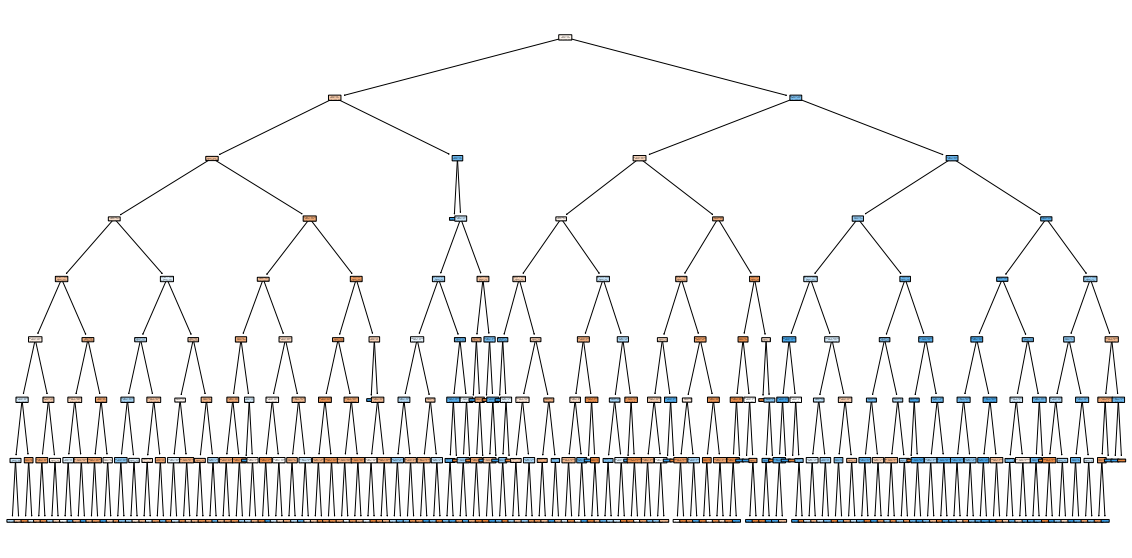

In [150]:
#Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree,export_text
plt.figure(figsize=(20,10))
plot_tree(DTree, filled=True,rounded=True,impurity=False,feature_names=list(X_train.columns))
print(export_text(DTree,feature_names=list(X_train.columns)))

In [151]:
# Predicting the target using the test data features
pred_dtree=DTree.predict(X_test)
pred_dtree

array([1, 1, 1, ..., 1, 1, 1])

#Model Validation

## Confusion Matrix and Accuracy

In [152]:
# Importing confusion_matrix
from sklearn.metrics import confusion_matrix

# Creating Confusion Matrix using the test data and the predicted value
cm=confusion_matrix(y_test,pred_dtree)
print(cm)

# Calculating the accuracy of the predicted value of the test data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[3635 1048]
 [1169 3027]]
Accuracy= 75.03
Sensitivity- 77.62
Specificity- 72.14


## Checking for Overfiiting and Underfitting of Model

In [153]:
# Predicting the target using the train data features
pred_dtree1=DTree.predict(X_train)

# Creating Confusion matrix using the train data and the predicted value
cm1=confusion_matrix(y_train,pred_dtree1)
print(cm1)

# Calculating the accuracy of the train data
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Train Accuracy=',round(accuracy1*100,2))

# Calculating the accuracy of the test data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Test Accuracy=',round(accuracy*100,2))

[[14929  3752]
 [ 4369 12462]]
Train Accuracy= 77.13
Test Accuracy= 75.03


## K-Fold Cross Validation

In [154]:
#Simple K-Fold cross validation. 10 folds.
from sklearn.model_selection import KFold
kfold_models = KFold(n_splits=10)

from sklearn import model_selection
scores = model_selection.cross_val_score(DTree,X, y,cv=kfold_models)
print(scores)
print("Avg K-Fold Accuracy", scores.mean())

[0.2268018  0.71164677 0.69880604 0.71525118 0.74363595 0.77652624
 0.41135391 0.71953143 0.70871818 0.70826763]
Avg K-Fold Accuracy 0.642053913002888


- There can be a situation of overfitting on train data as well as test data and model may memorize the train and test to check this we can use K-Fold Cross Validation


# Random Forest

## Building Random Forest 

In [157]:
X=cred_new_smote.drop('DEF_PAY',axis=1)
y=cred_new_smote['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split
import time

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=50)

from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

forest=RandomForestClassifier(n_estimators=100,max_features=7,max_depth=10,random_state=42)

forest.fit(X_train,y_train)

prediction=forest.predict(X_train)

print("Time taken by Random Forest "+ str((time.time() - start_time))+ " Seconds")

Time taken by Random Forest 11.937886238098145 Seconds


## Confusion Matrix,Accuracy,Sensitivityand Specificity

In [158]:
# Importing confusion_matrix
from sklearn.metrics import confusion_matrix

# Creating Confusion Matrix using the test data and the predicted value
cm=confusion_matrix(y_train,prediction)
print(cm)

# Calculating the accuracy of the predicted value of the test data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[16466  2215]
 [ 4265 12566]]
Accuracy= 81.75
Sensitivity- 88.14
Specificity- 74.66


In [159]:
# Predicting the target using the test data features
prediction1=forest.predict(X_test)

# Creating Confusion matrix using the test data and the predicted value
cm1=confusion_matrix(y_test,prediction1)
print(cm1)

# Calculating the accuracy of the train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Train Accuracy=',round(accuracy*100,2))

# Calculating the accuracy of the test data
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Test Accuracy=',round(accuracy1*100,2))

[[3937  746]
 [1193 3003]]
Train Accuracy= 81.75
Test Accuracy= 78.16


## Findings
- After hyperparameter tuning we have accuracy of
Train Accuracy= 81
Test Accuracy= 78 but the specificity which is most important is more that the decsion tree model.

- We have highest accuracy on the training data and matching accuracy on the test data its a good model to finalise but before finalising this RF model lets use Boosting Algorithm and see if it leads to better accuracy and Specificity or not.

# XGBOOST

## XGBOOST Model Building

In [160]:
X=cred_new_smote.drop('DEF_PAY',axis=1)
y=cred_new_smote['DEF_PAY']

# Importing the package
from xgboost import XGBClassifier
import time

start_time = time.time()

# Building XGB model for binary classification
model_new=XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1,eval_metric='error',
                        early_stopping_rounds=4,tree_method='hist')

model_new.fit(X_train,y_train)

predict2=model_new.predict(X_train)

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

Time taken by XGB 1.8827273845672607 Seconds


## Checking Accuracy,Sensitivity and Specificity

In [161]:
# Importing confusion_matrix
from sklearn.metrics import confusion_matrix

# Creating Confusion Matrix using the train data and the predicted value
cm=confusion_matrix(y_train,predict2)
print(cm)

# Calculating the accuracy of the predicted value of the test data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy=',round(accuracy*100,2))

# Calculating Sensitivity
Sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity-',round(Sensitivity*100,2))

# Calculating Specificity
Specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity-',round(Specificity*100,2))

[[16199  2482]
 [ 4111 12720]]
Accuracy= 81.43
Sensitivity- 86.71
Specificity- 75.57


In [162]:
# Predicting the target using the train data features
predict3=model_new.predict(X_test)

# Creating Confusion matrix using the test data and the predicted value
cm1=confusion_matrix(y_test,predict3)
print(cm1)

# Calculating the accuracy of the train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Train Accuracy=',round(accuracy*100,2))

# Calculating the accuracy of the test data
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Test Accuracy=',round(accuracy1*100,2))

[[3944  739]
 [1083 3113]]
Train Accuracy= 81.43
Test Accuracy= 79.48


## Findings
- From the train and test data accuracy we can conclude that the the model shows good accuracy on the train data and also on the test data
so there will be no problem of overfitting and underfitting.

- XGBoost Method gives almost equal  Specificity and Accuracy as compared to the Random Forest Method but the only difference is the computational time of XGBoost is 1.8 Sec which way more less than the computational time of Random Forest Algorithm that is nearly 12 secs So looking at the results we can finalize this XGBoostModel.


In [163]:
# Classification Report for Checking Recall Precision and F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_train,predict2))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     18681
           1       0.84      0.76      0.79     16831

    accuracy                           0.81     35512
   macro avg       0.82      0.81      0.81     35512
weighted avg       0.82      0.81      0.81     35512

